# Exercise 8 - Image Vertical Deblurring Using SVD and Pseudoinverse

1. **Imports**: Load necessary libraries including NumPy, SciPy, PIL, and Matplotlib.
2. **Load Image**: Open the blurred image (`parrot_blurred_vertical.jpg`) and convert it to grayscale.
3. **Construct Blur Matrix**: Create a Toeplitz matrix `A` representing the vertical blur kernel with blur length `omega = 30`.
4. **Compute Pseudoinverse**: Use SVD to calculate the pseudoinverse `A_plus` of the blur matrix.
5. **Recover Image**: Apply the pseudoinverse to the blurred image `B` to obtain the recovered image `X_plus`.
6. **Display Results**: Visualize the original blurred image and the recovered image side by side.

## Key Variables
- `B`: The blurred image as a NumPy array (shape: 1344x1344).
- `A`: The Toeplitz blur matrix (shape: 1344x1373).
- `A_plus`: Pseudoinverse of `A` (shape: 1373x1344).
- `X_plus`: Recovered image (shape: 1373x1344).
- Other variables include SVD components (`U`, `S`, `Vt`), rank `r_rank`, and parameters like `omega` and `tol`.

In [ ]:
# Step 1: Import
import numpy as np
from scipy.linalg import svd, toeplitz
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Blurred image shape: (1344, 1344)


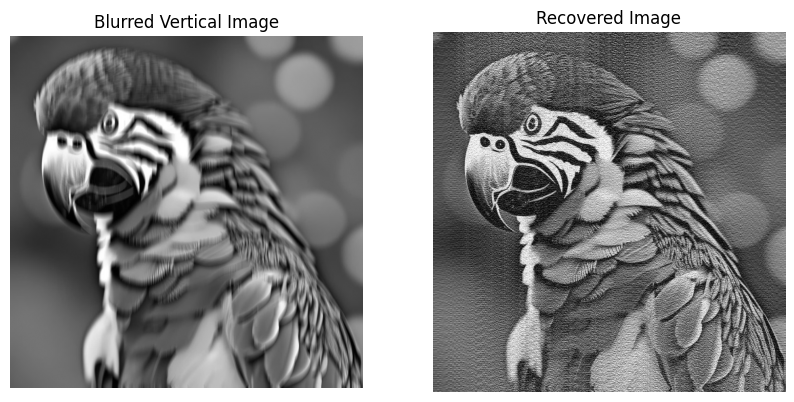

In [3]:
# Step 2: Open blurred image
verticaly_blurred_img = Image.open("parrot_blurred_vertical.jpg").convert("L")
B = np.array(verticaly_blurred_img, dtype=float)

r = B.shape[0]  # number of rows (height)
omega = 30  # blur length
n = r + omega - 1

print("Blurred image shape:", B.shape)

# Step 3: Construct blur matrix A (Toeplitz)
c = np.zeros(r)
c[0] = 1 / omega  # first column (formula 11)
r0 = np.zeros(n)
r0[:omega] = 1 / omega  # first row (formula 12)
A = toeplitz(c, r0)  # Toeplitz matrix (r x n)

# Step 4: Compute pseudoinverse of A via SVD
U, S, Vt = svd(A)
tol = 1e-10
r_rank = np.sum(S > tol)

Sigma_plus = np.zeros((Vt.shape[0], U.shape[0]))
for i in range(r_rank):
    Sigma_plus[i, i] = 1.0 / S[i]

A_plus = Vt.T @ Sigma_plus @ U.T

# Step 5: Recover image using formula (15)
X_plus = A_plus @ B

# Step 6: Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(B, cmap="gray")
plt.title("Blurred Vertical Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.clip(X_plus, 0, 255), cmap="gray")
plt.title("Recovered Image")
plt.axis("off")

plt.show()